In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, accuracy_score, f1_score, recall_score, precision_score

In [18]:
# 1. Carregar dataset

df = pd.read_csv('winequality-red.csv')
 
display(df)

df.info()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [19]:
X = df.drop(columns=['quality'])
y = df['quality']

feature_names = X.columns.tolist()
class_names = y.unique().astype(str).tolist()

# Verificar balanceamento da base
display(df['quality'].value_counts(normalize=True))

quality
5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: proportion, dtype: float64

In [20]:
from sklearn.model_selection import train_test_split

# Separar dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True)

In [21]:
# 2. Métricas
metricas = {
    'accuracy': make_scorer(accuracy_score),
    'f1_macro': make_scorer(f1_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro'),
    'precision_macro': make_scorer(precision_score, average='macro')
}

In [22]:
# 3. Pipeline
clf = DecisionTreeClassifier(random_state=42, max_depth=10,max_features=None,criterion='gini',min_samples_leaf=1,min_samples_split=2,splitter='best')
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', clf)
])

# 4. Validação cruzada com todas as métricas
cv_results = cross_validate(pipeline, X_train, y_train, cv=5, scoring=metricas)

# 5. Imprimir apenas médias
print("=== Média das Métricas CV ===")
for nome in metricas:
    media = np.mean(cv_results[f'test_{nome}'])
    print(f"{nome:<15}: {media:.4f}")

=== Média das Métricas CV ===
accuracy       : 0.6072
f1_macro       : 0.3386
recall_macro   : 0.3311
precision_macro: 0.3668


c:\Users\Robert Fernandes\Documents\Workspace\modelo-decision-tree\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Robert Fernandes\Documents\Workspace\modelo-decision-tree\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Robert Fernandes\Documents\Workspace\modelo-decision-tree\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` paramete

In [23]:
# 6. Treinar para visualizar a árvore
# Treina o classificador diretamente, sem normalização
clf = DecisionTreeClassifier(random_state=42, max_depth=10,
                             max_features=None, criterion='gini',
                             min_samples_leaf=1, min_samples_split=2,
                             splitter='best')

clf.fit(X, y)  # usa X original sem normalização
clf_trained = clf

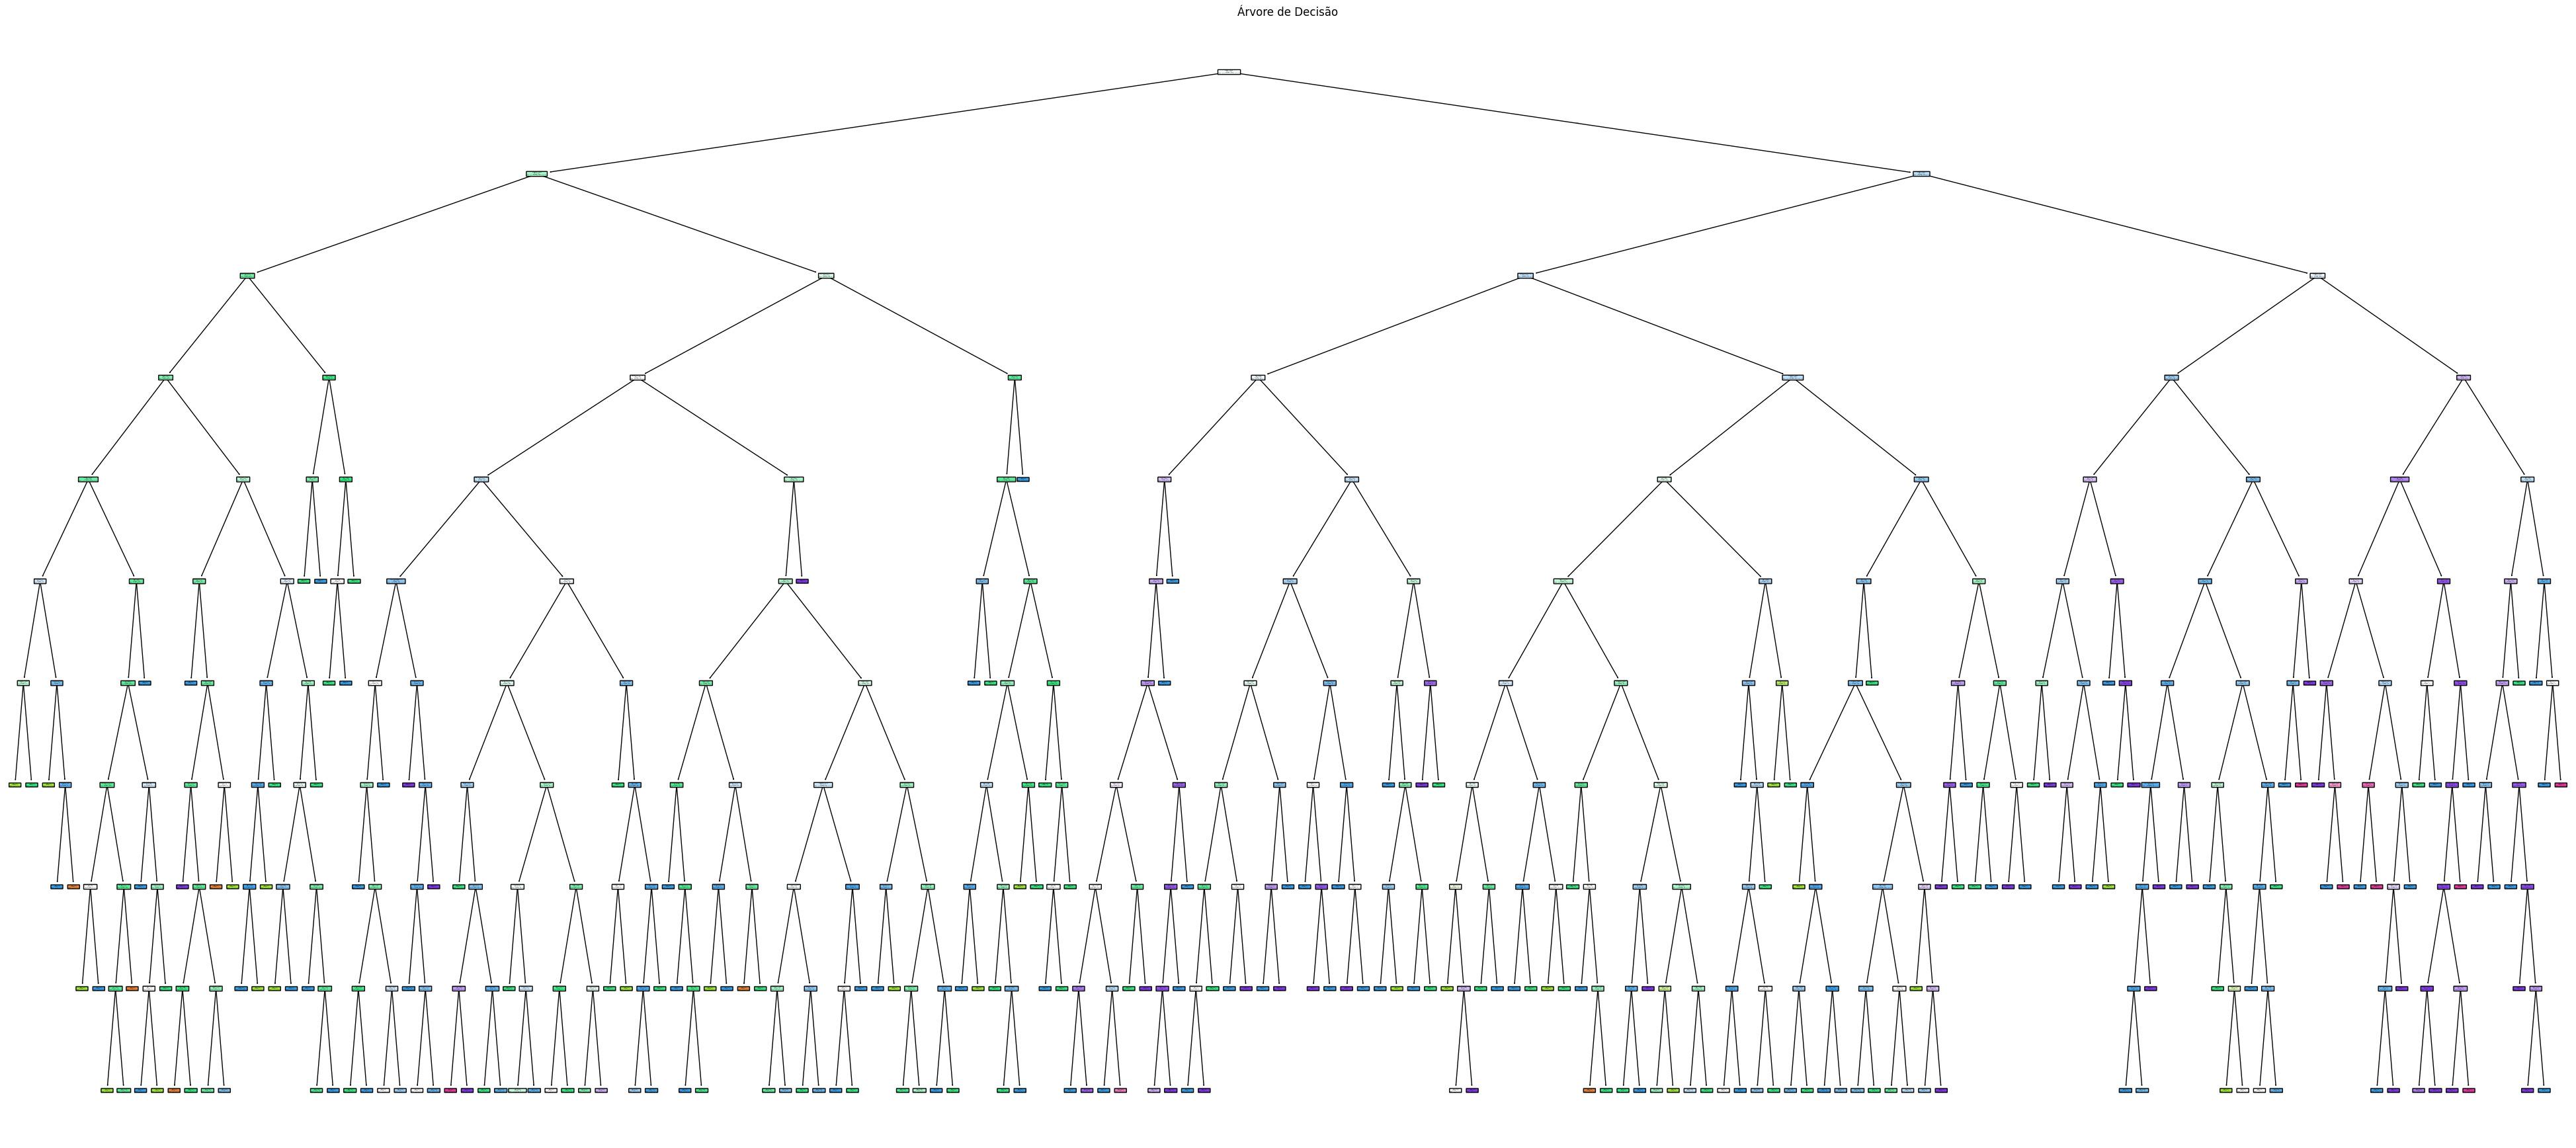

In [24]:
# 7. Plotar árvore
plt.figure(figsize=(50, 22))
plot_tree(clf_trained,
          feature_names=feature_names,
          class_names=class_names,
          filled=True,
          rounded=True)
plt.title("Árvore de Decisão")
plt.show()